# 肥美ㄉ專題

資料很重要，
大部分的時間都會花在資料的蒐集、處理上，
今天帶來一個小故事：做專題ㄉ阿明

在阿明的專題中，
阿明想要知道觀光景點的氣候資訊，
所以需要氣象站的資料，
阿明想要知道哪個氣象站離觀光景點最近，
以此來決定要用哪個氣象站的資料。

- 這裡示範了如何大膽的使用資料
- 該如何取得兩點之間的距離呢？阿明能夠成功嗎？
- 緊張又刺激的阿明之旅即將展開！
- 本故事中的所有角色純屬虛構


阿明決定先把等等會用到的東西`import`一下


In [ ]:
import os
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties


如何取得兩點之間的距離？
剎那間，
阿明想到可以用經緯度來計算兩點的距離，
那又要如何取得經緯度呢？


In [10]:
pd.read_csv('static/景點.csv')[0:5]

,編號,地點,地址,緯度,經度,類別
0,1,臺灣鹽博物館,724 臺南市七股區鹽埕里69號,23.15535,120.10565,地方展館、在地藝文、無障礙設施
1,2,七股鹽山,724 臺南市七股區鹽埕里66號,23.15427,120.10026,生態教育、自然景觀、休閒農漁、無障礙設施
2,3,北門遊客中心,727 臺南市北門區北門里舊埕200號,23.26715,120.12397,在地藝文、無障礙設施
3,4,井仔腳瓦盤鹽田,727 臺南市北門區永華里井仔腳興安宮旁,23.25958,120.10819,生態教育、自然景觀、無障礙設施
4,5,尖山埤江南渡假村,736 臺南市柳營區旭山里60號,23.26649,120.39331,生態教育



哇！真巧！
阿明找到的景點資料中，
剛好有經緯度的資訊！

阿明找的觀測站資料中，
該不會剛好也有經緯度的資訊吧？


In [12]:
pd.read_csv('static/觀測站.csv')[0:3]

,站號,站名,海拔高度(m),經度,緯度,城市,地址,資料起始日期,撤站日期,備註,Unnamed: 10
0,C0O810,曾文,161.0,120.497328,23.219681,臺南市,楠西區曾文新村(曾文水庫管理局內),1998/10/8,NaN,NaN,NaN
1,C0O830,北寮,127.0,120.495008,23.079561,臺南市,南化區北寮里48-4號,2013/4/18,NaN,原(C1O830)站因擴充為氣象站，於2013/4/18升級為(C0O830)站。,C1O830
2,C0O840,王爺宮,134.0,120.400850,23.222064,臺南市,六甲區王爺里24號（六甲國小湖東分校）,2013/12/1,NaN,原(C1O840)站因觀測條件不佳及擴充為氣象站，於2013/12/1升級為(C0O840)站。,C1O840



哇！比巧達起司還巧！
比巧克力還巧！
三商巧福看了都自嘆不如，
還真的有！

有這些資料，
為阿明省去了很多的時間，
現在阿明就可以開始進行愉快ㄉ程式之旅！


In [13]:
def __compute_distance(lat1, lng1, lat2, lng2):
    radlat1 = radians(lat1)
    radlat2 = radians(lat2)
    a = radlat1 - radlat2
    b = radians(lng1) - radians(lng2)
    s = 2 * asin(sqrt(pow(sin(a / 2), 2) + cos(radlat1) * cos(radlat2) * pow(sin(b / 2), 2)))
    earth_radius = 6378.137
    s = s * earth_radius
    if s < 0:
        return -s
    else:
        return s


阿明想到的第一件事就是上網找找有誰會用經緯度計算距離呢？
果真讓阿明找到，

第一天，阿明說要有距離，
於是有了距離。


In [38]:
# 測試 單位為公里
__compute_distance(120, 23, 121, 24)

124.8331458033635


有了計算距離的函式，
就可以計算距離了。

阿明寫了一個函式，
只要傳入景點的座標，
就可以得到與之最近的氣象站。


In [15]:
def __get_distance_point_to_site(point_lat, point_lng):
    sites = pd.read_csv('static/觀測站.csv')
    sites_name = sites['站名'].tolist()
    sites_lat = sites['經度'].tolist()
    sites_lng = sites['緯度'].tolist()

    tmp_for_search_name = {}
    tmp_distance = []
    for i, site_name in enumerate(sites_name):
        distance = __compute_distance(point_lat, point_lng, sites_lat[i], sites_lng[i])
        tmp_for_search_name[distance] = site_name
        tmp_distance.append(distance)
    nearest_site_distance = np.min(tmp_distance)
    nearest_site_name = tmp_for_search_name[nearest_site_distance]

    return [nearest_site_name, round(nearest_site_distance, 3)]

In [23]:
# 測試
__get_distance_point_to_site(120, 23)

['北門', 43.156]


阿明見證了生死離別，
差點迷失在花花世界中，
但在旅途的最後，
阿明想起了那時小花說的話，
「不要忘記最初的自己。」

阿明想起自己是為了資料而來，
在家鄉還有等待他的人。


In [39]:
def create_nearest_site_csv():
    points = pd.read_csv('static/景點.csv')
    points_name = points['地點'].tolist()
    points_lat = points['經度'].tolist()
    points_lng = points['緯度'].tolist()

    csv_data = []
    for i, point_name in enumerate(points_name):
        tmp = [point_name]
        tmp.extend(__get_distance_point_to_site(points_lat[i], points_lng[i]))
        csv_data.append(tmp)
    header = ["景點", "最近觀測站", "距離(km)"]
    pd.DataFrame(csv_data).to_csv('output/site_distance.csv', header=header, index=0, encoding='big5')

    print("檔案 site_distance.csv 已創建")


最終，
阿明帶著榮耀與資料，
凱旋而歸，可喜可賀。


In [21]:
pd.read_csv('output/site_distance.csv',encoding='big5')[0:5]

,景點,最近觀測站,距離(km)
0,臺灣鹽博物館,七股,2.206
1,七股鹽山,七股,1.607
2,北門遊客中心,北門,0.172
3,井仔腳瓦盤鹽田,北門,1.978
4,尖山埤江南渡假村,東河,1.900


## 即將進行愉快ㄉ畫圖

這裡示範如何愉快ㄉ畫圖
還可以選擇想要看的地區喔！


In [35]:
def create_one_tourist_table_or_all():
    file = pd.read_csv('static/遊客人數/2019/10801.csv')
    areas = file['觀光遊憩區別'].to_dict()

    for i, _ in enumerate(areas):
        print(i, end=" ")
        print(areas[i])

    number = int(input("輸入你想查看的地區的數字編號（不輸入則為全部，輸入 -1 忽略）： "))
    if number == -1:
        return
    __create_tourist_table(number)

In [36]:
def __create_tourist_table(number=None):
    file_directory_path = "static/遊客人數/"
    years = ['2018', '2019', '2020', '2021']

    file = pd.read_csv('static/遊客人數/2019/10801.csv')
    areas = file['觀光遊憩區別'].tolist()

    if number is not None:
        areas = [areas[number]]

    for year in years:
        file_list = os.listdir(file_directory_path + year)
        file_nums = len(file_list)

        for area in areas:
            tourist_count_ticket = []
            tourist_count = []

            for file_name in file_list:
                file = pd.read_csv(file_directory_path + year + '/' + file_name)
                file = file[file['觀光遊憩區別'] == area]
                try:
                    tourist_count_ticket.append(int(file['遊客人次有門票_需購票'].values[0].replace(',', '')))
                except:
                    tourist_count_ticket.append(0)
                try:
                    tourist_count.append(int(file['遊客人次無門票_免費'].values[0].replace(',', '')))
                except:
                    tourist_count.append(0)

            __draw_table(tourist_count, tourist_count_ticket, area, year, file_nums)

In [37]:
def __draw_table(tourist_count, tourist_count_ticket, area, year, file_nums):
    strChineseFont = 'msj.ttf'
    myFont = FontProperties(fname=strChineseFont)

    mouth = np.arange(1, file_nums + 1)
    y = np.arange(1, len(mouth) + 1)
    width = 0.3
    plt.bar(y, tourist_count, label="Free", width=width)
    plt.bar(y + width, tourist_count_ticket, label="Ticket", width=width)

    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.7))
    plt.xticks(y, mouth)
    plt.xlabel("月份", fontproperties=myFont)
    plt.ylabel("遊客數", fontproperties=myFont)
    plt.title(year + " " + area, fontproperties=myFont)
    plt.savefig('output/遊客/' + area + "_" + year)
    plt.show()


0 臺灣鹽博物館
1 七股鹽山
2 北門遊客中心
3 井仔腳瓦盤鹽田
4 尖山埤江南渡假村
5 烏山頭水庫風景區
6 曾文水庫
7 關子嶺溫泉區
8 虎頭埤風景區
9 南元休閒農場
10 走馬瀨農場
11 烏樹林休閒園區
12 頑皮世界
13 南鯤鯓代天府
14 麻豆代天府
15 馬沙溝濱海遊憩區
16 國立臺灣歷史博物館
17 奇美博物館
18 延平郡王祠
19 赤崁樓
20 臺南孔子廟
21 祀典武廟
22 五妃廟
23 大天后宮
24 安平小鎮
輸入你想查看的地區的數字編號（不輸入則為全部，輸入 -1 忽略）： 13


<ipython-input-28-9de1c0b654e5>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


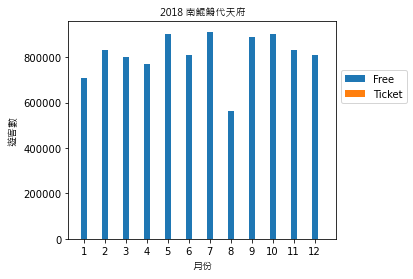

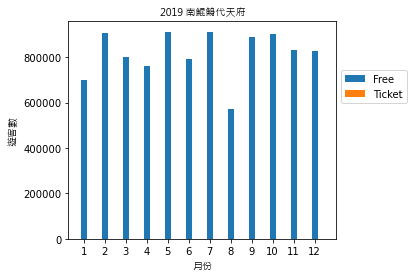

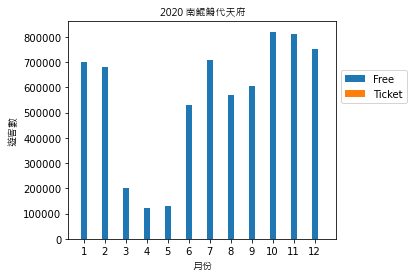

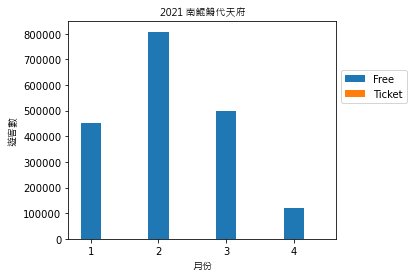

In [32]:
create_one_tourist_table_or_all()

## 肥美ㄉ專題暫時結束